# 项目宗旨：地铁人流量预测
From Udacity Data Science Final project
## Introduction
1、预测在任何时候有多少人会在纽约市（纽约市）使用地铁；
2、探讨当前的天气状况是否有助于预测进出地铁站的人数；
## Target
1、帮助纽约市的地铁运输管理局（MTA）省钱并使地铁更安全；
2、更准确地预测将有多少人访问某些站点可以让MTA更好地分配员工并预测否则会出乎意料的高峰期。

# Part 01 Imports that allow the Python code to work

In [1]:
#导入python未来支持的语言特征division(精确除法)
from __future__ import division #未导入该特征时，"/"操作符执行的是截断除法,导入精确除法之后，"/"执行的是精确除法

import datetime
import itertools  #itertools 是python的迭代器模块，itertools提供的工具相当高效且节省内存。
import operator   #operator模块输出一系列对应Python内部操作符的函数。例如：operator.add(x, y)等价于表达式x+y。
import brewer2mpl #一个专业的python配色工具包，提供了从美术角度来讲的精美配色

# import ggplot as gg #ggplot是基于R的ggplot2和Python的绘图系统, ggplot与python中的pandas有着共生关系
import pandas as pd
import numpy as np
import seaborn as sns
import pylab  #pylab是matplotlib一个子包，非常适合于进行交互式绘图
import scipy.stats  # python中做统计分析时一般使用 scipy.stats，包含了多种概率分布的随机变量，累积概率
import statsmodels.api as sm  #statsmodels是一个有很多统计模型的python库，statsmodels.api是基于数组的（array-based）线性模型

%matplotlib inline

pd.set_option("display.max_columns",200)
pd.set_option("max_row",200)
pd.set_option("display.float_format",lambda x: "%.2f" % x)

In [2]:
#数据读入
turnstile_data=pd.read_csv(r'D:\github_notebook\Machine Learning\turnstile_data_master_with_weather.csv',
                          sep=',',index_col=None)
print(turnstile_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131951 entries, 0 to 131950
Data columns (total 22 columns):
Unnamed: 0         131951 non-null int64
UNIT               131951 non-null object
DATEn              131951 non-null object
TIMEn              131951 non-null object
Hour               131951 non-null int64
DESCn              131951 non-null object
ENTRIESn_hourly    131951 non-null float64
EXITSn_hourly      131951 non-null float64
maxpressurei       131951 non-null float64
maxdewpti          131951 non-null float64
mindewpti          131951 non-null float64
minpressurei       131951 non-null float64
meandewpti         131951 non-null float64
meanpressurei      131951 non-null float64
fog                131951 non-null float64
rain               131951 non-null float64
meanwindspdi       131951 non-null float64
mintempi           131951 non-null float64
meantempi          131951 non-null float64
maxtempi           131951 non-null float64
precipi            131951 non-null fl

In [3]:
turnstile_data.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.00,0.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.00,553.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.00,1262.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.00,3708.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.00,2501.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00


In [4]:
#为便于绘图，增加了一个结合了日期和时间列的新列'DataTimeN'
turnstile_data['DataTimeN']=pd.to_datetime(turnstile_data['DATEn']+" "+turnstile_data['TIMEn'],
                                           format="%Y-%m-%d %H:%M:%S")
turnstile_data.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder,DataTimeN
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.00,0.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00,2011-05-01 01:00:00
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.00,553.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00,2011-05-01 05:00:00
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.00,1262.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00,2011-05-01 09:00:00
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.00,3708.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00,2011-05-01 13:00:00
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.00,2501.00,30.31,42.00,35.00,30.23,39.00,30.27,0.00,0.00,5.00,50.00,60.00,69.00,0.00,0.00,2011-05-01 17:00:00


# part 02 Exploring Data

In [5]:
#描绘一下进出纽约市所有地铁站的人数
turnstile_dt=turnstile_data[['DataTimeN',"ENTRIESn_hourly", "EXITSn_hourly"]]\
             .set_index('DataTimeN').sort_index()
turnstile_dt.head()

,ENTRIESn_hourly,EXITSn_hourly
DataTimeN,,
2011-05-01,0.00,0.00
2011-05-01,0.00,0.00
2011-05-01,0.00,0.00
2011-05-01,0.00,0.00
2011-05-01,0.00,0.00


In [6]:
turnstile_dt.tail()

,ENTRIESn_hourly,EXITSn_hourly
DataTimeN,,
2011-05-30 23:59:15,0.00,0.00
2011-05-30 23:59:30,2.00,283.00
2011-05-30 23:59:41,0.00,49.00
2011-05-30 23:59:43,0.00,0.00
2011-05-30 23:59:57,0.00,0.00


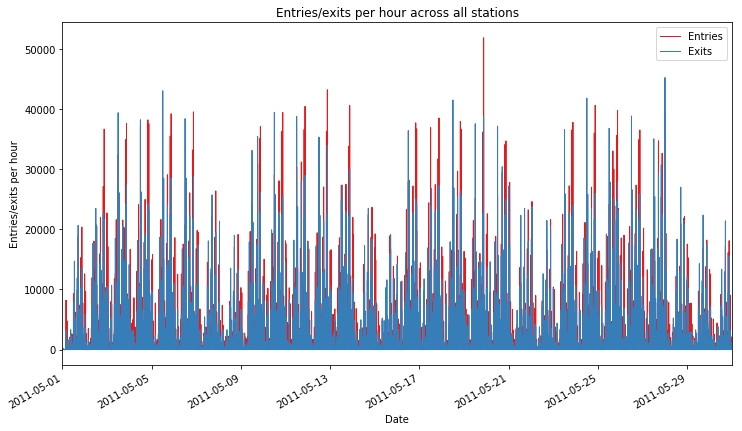

In [7]:
fig, ax=pylab.subplots(figsize=(12,7))
set1 = brewer2mpl.get_map('Set1', 'qualitative',3).mpl_colors  # Set1控制配色
turnstile_dt.plot(ax=ax,color=set1,linewidth=1)   #使用了DataFrame.plot(self, *args, **kwargs)
ax.set_title("Entries/exits per hour across all stations")
ax.legend(['Entries','Exits'])
ax.set_ylabel('Entries/exits per hour')
ax.set_xlabel('Date')
pass

## 结论
1、地铁进出入人流量呈现“间歇性密集”分布；
2、入口和出口每天似乎都有几次峰值，但很难判断这些峰值何时出现；
3、深入挖掘了一下。 首先，分析星期几如何影响每小时的进入/退出次数；

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# f,ax=plt.subplots(1,1,figsize=(10,10))
# turnstile_dt.plot.bar()

In [9]:
turnstile_day=turnstile_dt
turnstile_day['day']=turnstile_day.index.weekday  #从日期中提取星期 
turnstile_day=turnstile_day[['day',"ENTRIESn_hourly", "EXITSn_hourly"]].groupby('day').agg(sum)

In [10]:
turnstile_day.tail(10)

,ENTRIESn_hourly,EXITSn_hourly
day,,
0,24130096.00,19328635.00
1,22997954.00,18412602.00
2,23562636.00,18893500.00
3,23486649.00,18792191.00
4,23130773.00,18568675.00
5,14044105.00,11809143.00
6,13180114.00,11221387.00


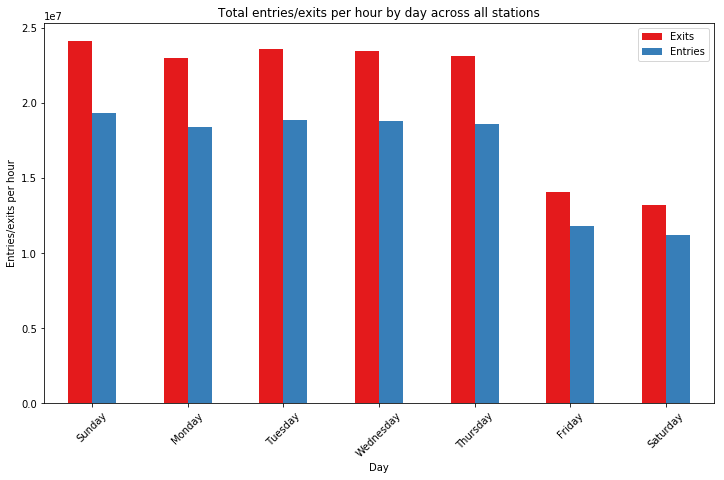

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,7))
set1 = brewer2mpl.get_map('Set1', 'qualitative',3).mpl_colors  #不同的参数，控制不同的配色效果，并无其他作用
turnstile_day.plot(ax=ax,kind='bar',color=set1)
ax.set_title('Total entries/exits per hour by day across all stations')
ax.legend(["Exits", "Entries"])
ax.set_ylabel("Entries/exits per hour")
ax.set_xlabel("Day")
ax.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                   rotation=45)
pass  # 是空语句，是为了保持程序结构的完整性

## 结论
1、星期五和星期六是最空闲的日子。
2、下一步可尝试绘制按小时分组的每小时进站人数和出站人数，以查看哪些小时比其他小时更繁忙；

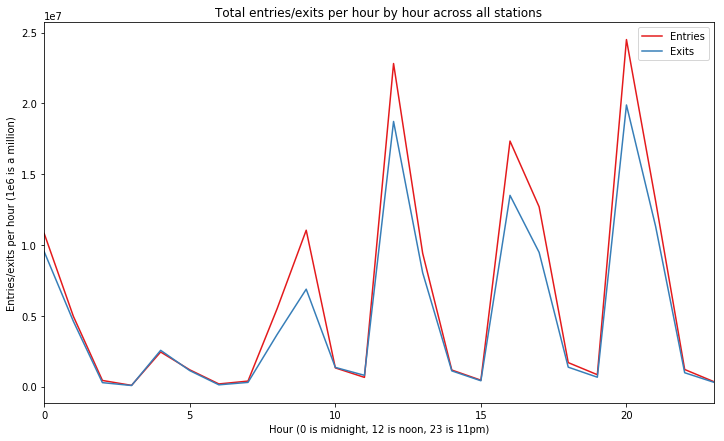

In [12]:
turnstile_dt['hour']=turnstile_dt.index.hour  #提取索引中的时间，并增加新的时间列
turnstile_by_hour=turnstile_dt
#按hour对数据进行聚合
turnstile_by_hour=turnstile_by_hour[["hour", "ENTRIESn_hourly", "EXITSn_hourly"]].groupby('hour').sum()#

# fig,ax=plt.subplots(figsize=(12,7))
fig, ax=pylab.subplots(figsize=(12,7))
set1=brewer2mpl.get_map('set1','qualitative',3).mpl_colors
turnstile_by_hour.plot(ax=ax,color=set1)
ax.set_title('Total entries/exits per hour by hour across all stations')
ax.legend(['Entries','Exits'])
ax.set_ylabel('Entries/exits per hour (1e6 is a million)')
ax.set_xlabel('Hour (0 is midnight, 12 is noon, 23 is 11pm)')
ax.set_xlim(0,23)
pass

## 结论
1、通过绘制按小时分组的每小时输入和退出的总数，我们可以看到白天确实存在多个尖峰。但是详细的分布关系需进一步精细绘图；
2、接下来考虑降雨对使用地铁的人数的影响，我们的天气数据中有一个“下雨”列，如果不下雨则为0，如果下雨为1。

In [13]:
turnstile_rain=turnstile_data[["rain", "ENTRIESn_hourly", "EXITSn_hourly"]]
# np.where(condition, x, y),满足条件(condition)，输出x，不满足输出y
turnstile_rain['rain2']=np.where(turnstile_rain['rain']==1,"raining", "not raining")  
turnstile_rain.groupby('rain2').describe()

c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


rain                                    ENTRIESn_hourly  \
               count mean  std  min  25%  50%  75%  max           count   
rain2                                                                     
not raining 87847.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00        87847.00   
raining     44104.00 1.00 0.00 1.00 1.00 1.00 1.00 1.00        44104.00   

                                                               EXITSn_hourly  \
               mean     std  min   25%    50%     75%      max         count   
rain2                                                                          
not raining 1090.28 2320.00 0.00 38.00 278.00 1111.00 43199.00      87847.00   
raining     1105.45 2370.53 0.00 41.00 282.00 1103.25 51839.00      44104.00   

                                                              
              mean     std  min   25%    50%    75%      max  
rain2                                                         
not raining 883.26 1998.52 0.00 31.00 231.00 846.00 45249.00  
raining     894.12 2028.55 0.00 33.00 235.00 849.00 41503.00

In [14]:
turnstile_rain['rain2'].value_counts()

not raining    87847
raining        44104
Name: rain2, dtype: int64

## 结论
1、在下雨时，每小时进入和退出的中位数和平均数比在没有下雨时高。 然而，数值差异非常小；
2、绘制数据的核密度估计值（KDE）。 KDE可以被认为是“平滑直方图”，通过此图进行对我们数据的概率分布函数（PDF）的估计，即“此时这个值的[0,1]的概率是多少？发生的？

In [21]:
turnstile_rain=turnstile_data[["rain", "ENTRIESn_hourly", "EXITSn_hourly"]]
turnstile_rain['ENTRIESn_hourly_log10']=np.log10(turnstile_rain["ENTRIESn_hourly"] + 1)  #取对数
turnstile_rain["rain2"] = np.where(turnstile_rain["rain"] == 1, "raining", "not raining")

c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
turnstile_rain

,rain,ENTRIESn_hourly,EXITSn_hourly,ENTRIESn_hourly_log10,rain2
0,0.00,0.00,0.00,0.00,not raining
1,0.00,217.00,553.00,2.34,not raining
2,0.00,890.00,1262.00,2.95,not raining
3,0.00,2451.00,3708.00,3.39,not raining
4,0.00,4400.00,2501.00,3.64,not raining
5,0.00,3372.00,2122.00,3.53,not raining
6,0.00,0.00,0.00,0.00,not raining
7,0.00,42.00,66.00,1.63,not raining
8,0.00,50.00,125.00,1.71,not raining
9,0.00,316.00,716.00,2.50,not raining


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-pro

Text(17.200000000000003, 0.5, 'Number of turnstiles')

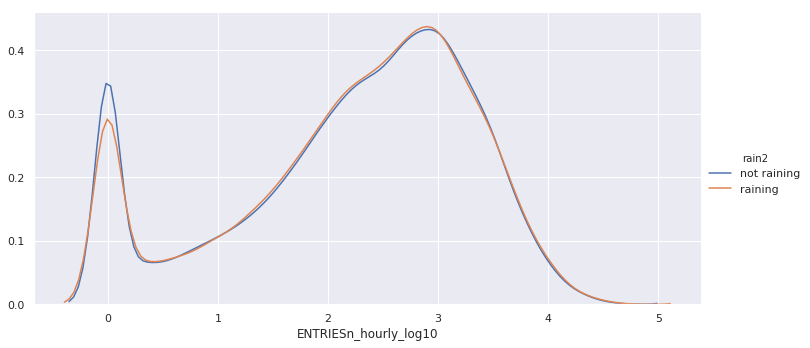

In [25]:
sns.set(style="darkgrid",font ='Time NewRoman',font_scale = 1)  #设置图片背景格式
df=turnstile_rain[['ENTRIESn_hourly_log10','rain2']]
facet=sns.FacetGrid(df,hue="rain2",height=5,aspect=2)  #先sns.FacetGrid画出轮廓
facet.map(sns.kdeplot,'ENTRIESn_hourly_log10',shade=False).add_legend()   #然后用map填充内容，此处为kdeplot(核密度估计图)，
# sns.kdeplot(turnstile_rain['ENTERSn_hourly_log10'],shade=True,legend=True)  #只能绘制单条曲线
ax.set_title('Entries per hour whilst raining and not raining')
ax.legend("raining","not raining")
ax.set_xlabel("ENTRIESn_hourly_log10")
ax.set_ylabel("Number of turnstiles")

## 结论：
1、我们在x轴上绘制ENTRIESn_hourly_log10的核密度曲线KED，对方式绘制“进站时间”ENTRIESn_hourly取对数log10，可以更容易地在同一图表中拟合具有极值的数据，实现降噪的目的；
2、之前的数据表明貌似在下雨时每小时有更多人出行，但差距并不明显。 通过绘制KDE告诉我们：在MTA上不同“模式”下的旅行的人数不会根据下雨而改变。

# Analysing data
1、我们想当然认为下雨的时候有更多的人乘坐地铁，而不是依赖于图表；
2、下一步我们将以一种数字方式分析有多确定存在差异，即：比较给定两组数据，是否具有相同的平均值。
3、考察“所给数据是否正常分布，以便我可以对其进行 t-检验？”

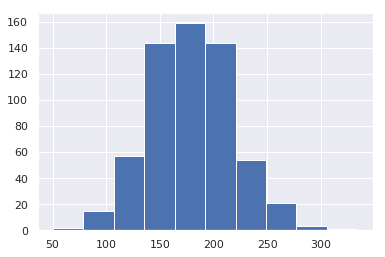

In [26]:
#列举一个正态分布的例子
np.random.seed(42)
data = pd.Series(np.random.normal(loc=180, scale=40, size=600))
data.hist()  #“钟形曲线”

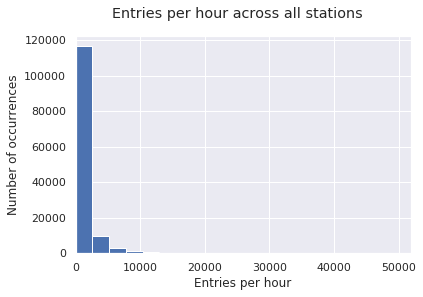

In [27]:
p=turnstile_data["ENTRIESn_hourly"].hist(bins=20)  #绘制直方图
pylab.suptitle("Entries per hour across all stations")
pylab.xlabel("Entries per hour")
pylab.ylabel("Number of occurrences")
plt.xlim(0,max(turnstile_data["ENTRIESn_hourly"]))  #设置X轴的范围
pass

In [28]:
# scipy.stats.normaltest是专门做正态性检验的模块 scipy.stats.normaltest(a, axis=0, nan_policy=’propagate’)
(k2,pvalue) = scipy.stats.normaltest(turnstile_data["ENTRIESn_hourly"])  
print(pvalue)  # 返回值pvalue——假设检验的双侧卡方概率

0.0


## 结论
1、此处，我们避免使用Shapiro-Wilk测试（scipy.stats.shapiro），因为它不适用于具有超过5000个值的数据集；
2、正态性检验（scipy.stats.normaltest）返回了接近0的p值，这意味着数据很可能不是正态分布的，即：我们不能使用t检验！
3、下一步，尝试用Mann-Whitney U测试，该测试并不假设数据是正态分布的。4、Mann-Whitney U检验是用得最广泛的两独立样本秩和检验方法。简单的说，该检验是与独立样本t检验相对应的方法，当正态分布、方差齐性等不能达到t检验的要求时，可以使用该检验。其假设基础是：若两个样本有差异，则他们的中心位置将不同。

In [29]:
not_raining = turnstile_data[turnstile_data["rain"] == 0]
raining = turnstile_data[turnstile_data["rain"] == 1]
# 计算样本x和y的Mann-Whitney秩检验。
(u,pvalue) = scipy.stats.mannwhitneyu(not_raining["ENTRIESn_hourly"],raining["ENTRIESn_hourly"])
print("Median entries per hour when not raining: %s" % not_raining["ENTRIESn_hourly"].median())  #中位数
print("Median entries per hour when raining: %s" % raining["ENTRIESn_hourly"].median())
print("p-value of test statistic: %.4f" % (pvalue * 2,) )

Median entries per hour when not raining: 278.0
Median entries per hour when raining: 282.0
p-value of test statistic: 0.0499


## 结论
由于scipy.stats.mannwhiteneyu返回的是单侧p值，并且在收集数据之前我们没有预测哪个组具有更高的平均值，所以，我们使用单侧p值 * 2 得到双侧p值[1] [2]。 如此，我们便认为，在5％的确定度下，每小时的平均入站人流量的不同，取决于是否正在下雨[3]。

# Part 03. Creating and evaluating models of data

In [30]:
turnstile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131951 entries, 0 to 131950
Data columns (total 23 columns):
Unnamed: 0         131951 non-null int64
UNIT               131951 non-null object
DATEn              131951 non-null object
TIMEn              131951 non-null object
Hour               131951 non-null int64
DESCn              131951 non-null object
ENTRIESn_hourly    131951 non-null float64
EXITSn_hourly      131951 non-null float64
maxpressurei       131951 non-null float64
maxdewpti          131951 non-null float64
mindewpti          131951 non-null float64
minpressurei       131951 non-null float64
meandewpti         131951 non-null float64
meanpressurei      131951 non-null float64
fog                131951 non-null float64
rain               131951 non-null float64
meanwindspdi       131951 non-null float64
mintempi           131951 non-null float64
meantempi          131951 non-null float64
maxtempi           131951 non-null float64
precipi            131951 non-null fl

1、通过绘制各种图表并使用统计测试，我们已经确定了“星期”，“一天中的小时”以及“下雨与否”会影响乘坐MTA的人数。
2、然而，我们预期目标是——预测在任何特定时间有多少人使用纽约市的地铁；
3、在机器学习中，预测连续变量（如高度，重量，每小时的条目数等）的任务称为“回归”。接下来，我们将采用线性回归的方法，使用我们已经使用图表确认的变量来预测每小时的条目数量（即：“星期”，“一天中的小时”以及“下雨与否”会影响乘坐MTA的人数的影响）；
4、**连续变量**——（1）“下雨量”（“precipi”列）（2）“一天中的小时（0到23）”（“Hour”列）（3）“华氏温度的平均温度为整数”（“meantempi”列）；
**分类变量**——“哪个地铁站的乘客量”（“UNIT”列），对于分类变量需进行“独热编码”转化为numerical型（数值型）；

In [31]:
#定义线性回归的损失函数
def compute_cost(features, values, theta):
    m = len(values)
    predictions = features.dot(theta)
    return (1/ (2 * m)) * np.square(predictions-values).sum()

In [32]:
#定义梯度下降法，寻找使损失函数最小化的一组theta值
def gradient_descent(features, values, theta, alpha, num_iterations):
    m=len(values)
    cost_history = []
    for i in range(num_iterations):
        loss = features.dot(theta) - values
        delta = (alpha/m) * loss.dot(features)
        theta -= delta
        cost_history.append(compute_cost(features, values, theta))
    return theta, pd.Series(cost_history)

使用梯度下降来解决线性回归的损失函数的一个问题是，如果我们不使用**特征缩放**将每个输入特征，缩放到-1≤𝑥𝑖≤1的范围，那么我们的算法将花费很长时间才能收敛。 因此，我们将对输入特征进行缩放，以加快收敛速度，但这不会影响我们解决方案的正确性。

In [33]:
#定义分类特征的缩放函数
def normalize_features(array):
    mu = array.mean()
    sigma = array.std()
    normalized = (array - mu) / sigma
    return (normalized, mu, sigma)

In [34]:
# 定义预测函数
def predictions(features, values, alpha, num_interations):
    m = len(values)
    theta = np.zeros(features.shape[1])
    theta, cost_history = gradient_descent(features, values, theta, alpha, num_interations)
    predictions = features.dot(theta)
    predictions[predictions<0] = 0  # Predictions less than 0 make no sense, so just set them to 0
    return pd.Series(predictions)

dummy_units = pd.get_dummies(turnstile_data['UNIT'],prefix='unit')
features = turnstile_data[['rain', 'precipi', 'Hour', 'meantempi']].join(dummy_units)  # 合并独热编码后的“分类特征”
features, mu, sigma = normalize_features(features)
features = np.array(features)
features = np.insert(features, 0, 1, axis=1)
#a.flatten()：a是个数组/矩阵，a.flatten()就是把a降到一维，默认是按行的方向降维，返回一个折叠成一维的数组
values =np.array(turnstile_data[['ENTRIESn_hourly']]).flatten()  
pred = predictions(features=np.array(features),values=values,
                   alpha=0.1,num_interations=150)
turnstile_data[["UNIT", "DataTimeN", "ENTRIESn_hourly"]].join(pd.Series(pred,name="prdictions")).head(n=10)

,UNIT,DataTimeN,ENTRIESn_hourly,prdictions
0,R001,2011-05-01 01:00:00,0.00,3380.27
1,R001,2011-05-01 05:00:00,217.00,3649.86
2,R001,2011-05-01 09:00:00,890.00,3919.45
3,R001,2011-05-01 13:00:00,2451.00,4189.03
4,R001,2011-05-01 17:00:00,4400.00,4458.62
5,R001,2011-05-01 21:00:00,3372.00,4728.21
6,R002,2011-05-01 01:00:00,0.00,317.14
7,R002,2011-05-01 05:00:00,42.00,586.73
8,R002,2011-05-01 09:00:00,50.00,856.31
9,R002,2011-05-01 13:00:00,316.00,1125.90


In [35]:
features

array([[ 1.        , -0.70855551, -0.4015719 , ..., -0.23455655,
        -0.15562002, -0.16528617],
       [ 1.        , -0.70855551, -0.4015719 , ..., -0.23455655,
        -0.15562002, -0.16528617],
       [ 1.        , -0.70855551, -0.4015719 , ..., -0.23455655,
        -0.15562002, -0.16528617],
       ...,
       [ 1.        ,  1.41131134,  0.2744111 , ..., -0.23455655,
        -0.15562002,  6.05006722],
       [ 1.        ,  1.41131134,  0.2744111 , ..., -0.23455655,
        -0.15562002,  6.05006722],
       [ 1.        ,  1.41131134,  0.2744111 , ..., -0.23455655,
        -0.15562002,  6.05006722]])

## 评估方法
评估预测结果的优劣：一种简单的方法是计算coefficient of determination（确定系数），该系数可以衡量模型能够捕获的数据的可变性。 它从0到1不等，值越大则证明预测模型的结果越好。

$
\begin{aligned}
R^2 &= 1 - \frac{\sigma_\textrm{errors}^2}{\sigma_\textrm{data}^2} \\
&= 1 - \frac{ \displaystyle \sum_{i=1}^{m} \left( y_i - f_i \right)^2 }{ \displaystyle \sum_{i=1}^{m} \left( y_i - \bar{y}_i \right)^2 }
\end{aligned}
$

In [36]:
# 确定系数计算函数定义
def compute_r_squared(data, prdictions):
    numerator = np.square(data - predictions).sum()
    denomenator = np.square(data - data.mean()).sum()
    return 1- numerator / denomenator

In [42]:
"%.3f" % compute_r_squared(turnstile_data["ENTRIESn_hourly"], pred)

'0.465'

## 结论
1、利用coefficient of determination，只能识别出我们的模型所训练的数据中存在的46％的变化；
2、考虑确定统计模型的另一种方法——绘制残差图，其被定义为预测值和实际值之间的差异。 残差是一个模型中不希望数据存在的变化；
3、一个好的模型的残差图呈现正态分布分布，平均值为0，并且存在有限的方差[4]。

<module 'matplotlib.pyplot' from 'c:\\users\\evan\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

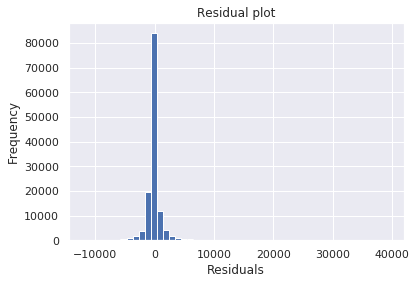

In [43]:
#绘制残差图
def plot_residuals(df,predictions):
    plt.figure()
    (df["ENTRIESn_hourly"]-predictions).hist(bins=50)
    pylab.title("Residual plot")
    pylab.xlabel("Residuals")
    pylab.ylabel("Frequency")
    return plt

plot_residuals(turnstile_data, pred)

In [46]:
# 对残差结果进行“正态性检验”
residuals = turnstile_data["ENTRIESn_hourly"]-pred
(zscore, pvalue) = scipy.stats.normaltest(residuals)
print("p-value of normaltest on residuals: %s" % pvalue)
print("mean of residuals: %s" % residuals.mean())

p-value of normaltest on residuals: 0.0
mean of residuals: -64.06875327870551


## 结论
尽管，当前的模型看起来非常合适，但残差图表明剩余误差中可能存在一些可以减少的结构。

# Going Further

##  改进的模型方法：
一般来说，当我们需要提高某些统计模型的性能时，总有两个步骤可供我们使用：
（1）使我们的模型更复杂；（2）为其提供更多数据。
由于当前为线性回归模型，我们只是传递了一小部分特征的原始值。 接下来，我们可以使模型更复杂，并传递更多功能，看看是否有帮助。

In [57]:
#对原始数据增加特征变量，进行同样的数据处理和分析
dummy_units = pd.get_dummies(turnstile_data['UNIT'],prefix='uint')
features = turnstile_data[['rain', 'precipi', 'Hour', 'meantempi', 'mintempi', 'maxtempi',
                           'mindewpti', 'meandewpti', 'maxdewpti', 'minpressurei',
                           'meanpressurei', 'maxpressurei', 'meanwindspdi']].join(dummy_units)
features, mu, sigma = normalize_features(features)  #调用定义分类特征的缩放函数normalize_features
features = np.array(features)
# np.insert（arr，obj，values，axis）,arr是一个数组，obj是元素插入的位置,values是需要插入的数值,axis是指示在哪一个轴上对应的插入位置进行插入
features = np.insert(features, 0, 1,axis=1)  
values = np.array(turnstile_data[['ENTRIESn_hourly']]).flatten()
pred2 = predictions(features=np.array(features),values=values,
                   alpha=0.1,num_interations=150)      # 增加特征后的pred
print("origial R^2: %.3f "% compute_r_squared(turnstile_data["ENTRIESn_hourly"],pred))
print("more existing features R^2: %.3f" %compute_r_squared(turnstile_data["ENTRIESn_hourly"],pred2))

origial R^2: 0.465 
more existing features R^2: 0.467


## 结论
1、可以使用特征的polynomial combinations（多项式组合）来为我们的线性回归模型提供更好的数据拟合结果；
2、多项式组合的缺点是使用的特征数量急剧增加，并且训练和使用模型都需要更长的时间。

In [62]:
# 定义关于特征的多项式组合函数
def add_polynomial_features(df, degree, add_sqrt):
    for i in range(2, degree +1 ):
        for combination in itertools.combinations_with_replacement(df.columns, i):
            # itertools.combinations_with_replacement(iterable, r) 允许重复元素的组合
            name = "".join(combination)
            value = np.prod(df[list(combination)],axis=1)  
            #np.prod()函数用来计算所有元素的乘积，对于有多个维度的数组可以指定轴，如axis=1指定计算每一行的乘积
            df[name] = value
        if add_sqrt:
            for column in df.columns:
                df["%s_sqrt" % column] = np.sqrt(df[column])  #np.sqrt(x) ： 计算数组各元素的平方根
    
dummy_units = pd.get_dummies(turnstile_data["UNIT"],prefix="unit")
features = turnstile_data[['rain', 'precipi', 'Hour', 'meantempi', 'mintempi', 'maxtempi',
                           'mindewpti', 'meandewpti', 'maxdewpti', 'minpressurei',
                           'meanpressurei', 'maxpressurei', 'meanwindspdi']]
add_polynomial_features(features, 2, add_sqrt=True)
features = features.join(dummy_units)
features, mu, sigma = normalize_features(features)
features = np.array(features)
features = np.insert(features,0,1,axis=1)
values = np.array(turnstile_data[["ENTRIESn_hourly"]]).flatten()
pred3 = predictions(features=np.array(features),values=values,
                   alpha=0.025,num_interations=150)
print("original R^2: %.3f" % compute_r_squared(turnstile_data['ENTRIESn_hourly'],pred))
print("more existing features R^2:%.3f"% compute_r_squared(turnstile_data['ENTRIESn_hourly'],pred2))
print("more existing features with polynomial combinations R^2: %.3f" 
      % compute_r_squared(turnstile_data["ENTRIESn_hourly"],pred3))

c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


original R^2: 0.465
more existing features R^2:0.467
more existing features with polynomial combinations R^2: 0.472


## 结论
1、增加模型复杂性的缺点是，我们的模型已经足够复杂，而我们需要喂给它更多的数据；
2、为了收集和处理大量数据，我们可能不得不采用像MapReduce这样的并发模型，其中大量数据由许多计算机处理，这些计算机之间不能相互通信，而是写入共享文件系统。
3、判断模型是否足够复杂的方法——在机器学习术语中，被称为 bias/variance（偏差/方差）问题：（1）如果模型的bias较高，那么它就不适合data,且无法较好地拟合data，此时增加数据量已经无济于事，因为模型已经不是用于数据，正确的做法是增加模型的复杂度；（2）如果模型的variance较高，那么data将发生过拟合和模型复杂度过高，此时，应该添加更多的data，即：提高data的复杂度，并降低模型过度拟合数据的可能性。
4、为了确定我们的模型究竟是bias较高，还是variance较高，我们可以通过绘制学习曲线 (learning curves)来确定。
5、我们不是在所有可用的数据集上进行模型训练，而是将数据集分成三部分：训练集，交叉验证集和测试集。
6、一种较好的默认拆分方法是——training约为60％，cross-validation约为20％，testing约为20％。 
7、在我们的案例中，由于我们仅绘制学习曲线而不评估我们模型的普遍性，所以我们训练集划分为：training为60％，cross-validation为40％。
8、绘制相对于training样本数量的$J_\textrm{CV}(\theta)$ 和 $J_\textrm{train}(\theta)$。在提供更多训练样本的同时，重新训练$\theta$的新值并在training set ($J_\textrm{train}(\theta)$) 和cross-validation set ($J_\textrm{CV}(\theta)$)上绘制成本函数。
9、具体判断方法如下：（1）如果$J_\textrm{CV}(\theta) \approx J_\textrm{train}(\theta)$ ，随着样本数量的增加，bias将增大，该模型无法捕获数据的pattern；（2）如果$J_\textrm{CV}(\theta) >> J_\textrm{train}(\theta)$，则可能是所选模型太复杂并且训练数据发生过拟合造成的，此时增加训练样本的数量有助于提高模型的性能。

In [63]:
def get_shuffled_df(df):
    m = len(turnstile_data)
    df = turnstile_data.copy()
    df = df.reindex(np.random.permutation(df.index))  
    #np.random.permutation,是对原来的数组进行重新洗牌（即随机打乱原来的元素顺序）,返回一个新的打乱顺序的数组，并不改变原来的数组
    return df

np.random.seed(42)
df = get_shuffled_df(turnstile_data)

In [68]:
m = len(df)
df_train = df[:int(0.6*m)]  #截取60%的训练集
df_cv = df[int(0.6*m):]      #截取剩余40%的cross-validation集

feature_names = ['rain', 'precipi', 'Hour', 'meantempi']
value_name = "ENTRIESn_hourly"

# traing的数据处理
dummy_units = pd. get_dummies(df_train['UNIT'],prefix="unit")
features_train = df_train[feature_names].join(dummy_units)
features_train, mu, sigma = normalize_features(features_train)
features_train = np.array(features_train)
features_train = np.insert(features_train,0,1,axis=1)  #第四个参数axis是指示在哪一个轴上对应的插入位置进行插入
#np.insert(arr，obj，values，axis),在对应的位置上插入对应的值
values_train = df_train[value_name]

# cross-validation的数据处理
dummy_units = pd.get_dummies(df_cv['UNIT'],prefix="unit")
features_cv = df_cv[feature_names].join(dummy_units)
features_cv = (features_cv-mu) / sigma
features_cv = np.array(features_cv)
features_cv = np.insert(features_cv,0,1,axis=1)
values_cv = df_cv[value_name]

In [69]:
#绘制学习曲线的相关函数
def get_learning_curves(features_train, values_train,
                        features_cv,values_cv,num_points=10,
                       alpha=0.1,num_iterations=150):
    cost_train = []
    r_squared_train = []
    cost_cv = []
    r_squared_cv = []
    m = len(features_train)
    number_of_samples = np.array(np.linspace(m/num_points, m-1, num_points),dtype=np.int)  #生成等差数列
    for i in number_of_samples:
        features_train_subset = features_train[:i]
        values_train_subset = values_train[:i]
        theta = np.zeros(features_train_subset.shape[1])
        theta, _ = gradient_descent(features_train_subset,values_train_subset,
                                    theta,alpha, num_iterations)   #调用梯度下降函数
        cost_train_subset = compute_cost(features_train_subset,values_train_subset,theta)
        cost_train.append(cost_train_subset)
        r_squared_train.append(compute_r_squared(values_train_subset,features_train_subset.dot(theta)))
        cost_cv_subset = compute_cost(features_cv, values_cv,theta)
        cost_cv.append(cost_cv_subset)
        r_squared_cv.append(compute_r_squared(values_cv,features_cv.dot(theta)))
    return pd.DataFrame({'Number of samples': number_of_samples,
                        'Training error': cost_train,
                        'Testing error': cost_cv,
                        'R^2 training': r_squared_train,
                        'R^2 testing': r_squared_cv})

np.random.seed(42)
costs = get_learning_curves(features_train, values_train,features_cv,values_cv)

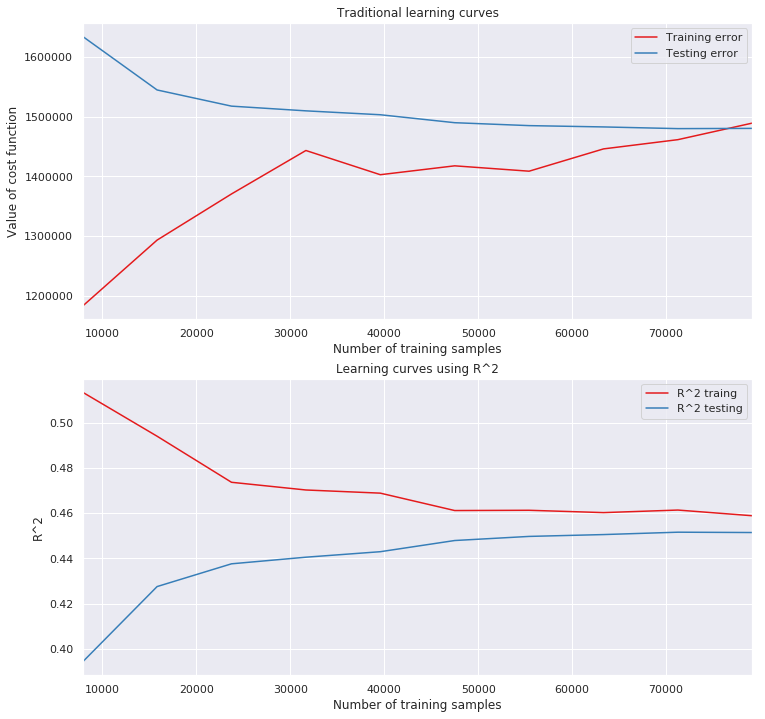

In [79]:
#绘制学习曲线
fig, (ax1, ax2) = pylab.subplots(nrows=2,ncols=1,figsize=(12,12))
set1 = brewer2mpl.get_map("Set1","qualitative",3).mpl_colors
costs.plot(x="Number of samples", y=['Training error', 'Testing error'],ax=ax1,color=set1)
ax1.set_title("Traditional learning curves")
ax1.legend()
ax1.set_xlabel("Number of training samples")
ax1.set_ylabel("Value of cost function")
costs.plot(x="Number of samples",y=["R^2 training", "R^2 testing"],ax=ax2,color=set1)
ax2.set_title("Learning curves using R^2")
ax2.legend()
ax2.set_xlabel("Number of training samples")
ax2.set_ylabel("R^2")
pass

## 结论
1、“学习曲线”出现训练错误超出测试错误的情况，这可能是由于随机错误造成的；
2、要绘制更稳健的“学习曲线”，需要使用“bootstrapping”来评价训练集和测试集上成本函数的值，而不是使用单个样本；
3、观察替代传统“学习曲线”的使用“确定系数R^2”绘制的非常规“学习曲线”，表明：当前使用的模型的bias较高；
4、测定的训练系数和测试系数几乎相等，并且基本不随样本数量发生变化，因此，我们不必通过增加训练样本的数量来改善学习算法的性能，反之，我们应该更专注于提升模型的复杂度，从而改善学习算法的性能，正如我们上面所做的那样，例如：添加多项式特征，或者，可以使用更高级的回归技术，例如：神经网络或支持向量回归（SVR）；
5、当然，还存在用一种可能性是，我们当前可用的与天气有关的特征并不包含足够的信息以更好地预测MTA的乘客数量，但判断这是否属实较为困难。

# 引入复杂模型——XGBoost

In [80]:
features_train.shape

(79170, 470)

In [81]:
values_train.shape

(79170,)

In [83]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

params = [3,5,6,9]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf,features_train,values_train,cv=3,
                                          scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:06:45] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:42] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:38] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:09:39] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:11:11] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:36] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:14:01] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:15:41] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:17:26] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:19:05] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:21:39] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:13] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 1.0, 'max_depth vs CV Error')

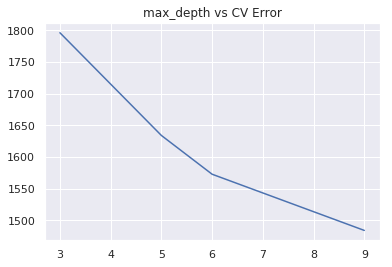

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error")